In [3]:
import scipy as sp
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy import random
import functions as fs
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
from scipy.special import binom

<font size="5">Exercise 1</font> <br>
<font size="4">Item a)</font> <br>
Here we are generating samples for three different distribuitions: uniform distribution from 0 to 1, normal distribution of mean 0 and variance 1 and a function given by $x$.

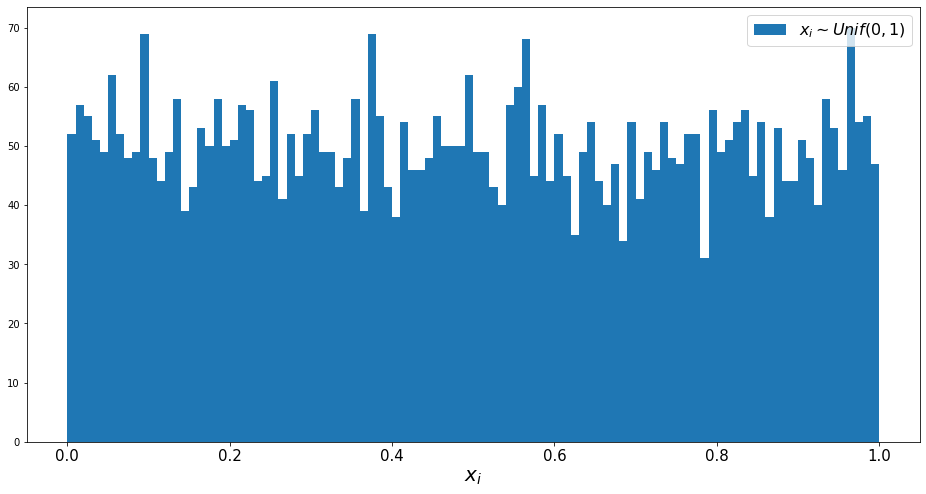

In [64]:
x = random.uniform(0,1,5000)

plt.hist(x, 100, label = '${x_i} \sim Unif(0,1)$')
plt.xticks(fontsize = 15)
plt.xlabel('${x_i}$', fontsize = 20)
plt.legend(prop={'size': 16})

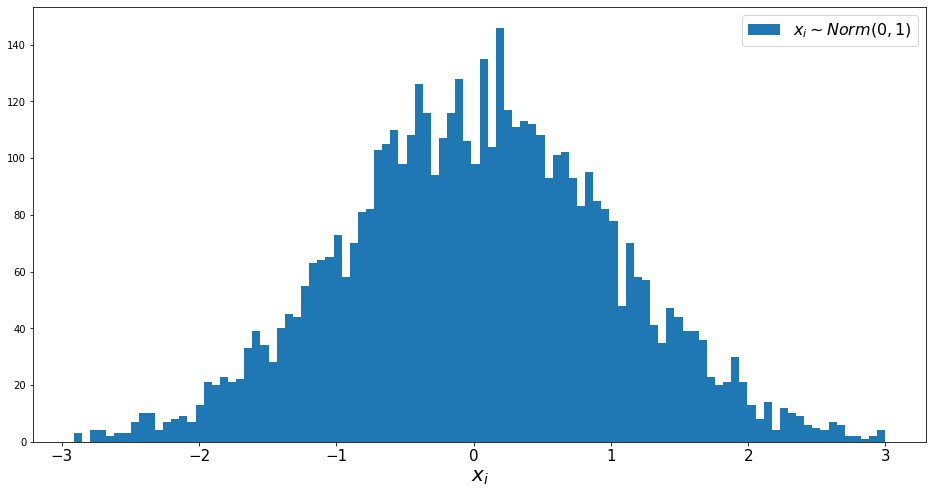

In [383]:
mu = 0
sigma = 1
n = fs.sampler(-3,3,fs.gaussian_func,(mu,sigma),5000)

plt.hist(n, 100, label = '${x_i} \sim Norm(0,1)$')
plt.xticks(fontsize = 15)
plt.xlabel('${x_i}$', fontsize = 20)
plt.legend(prop={'size': 16})

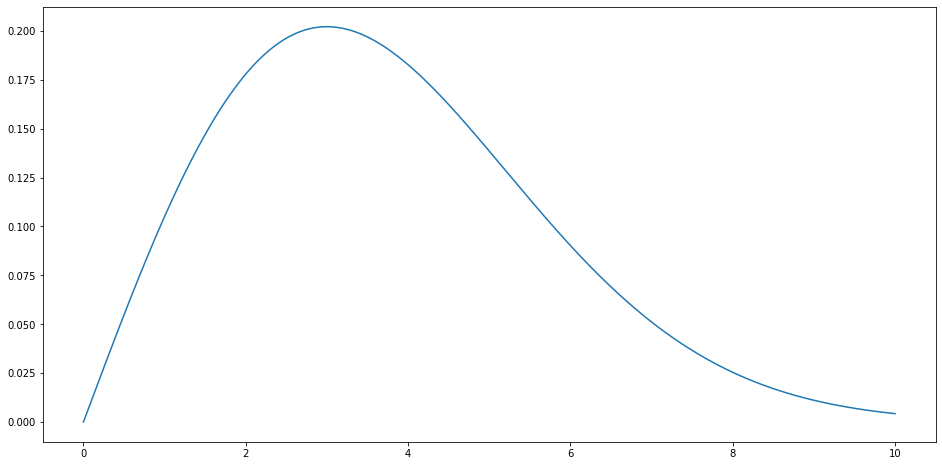

In [2]:
sigma_ = 3
x_0 = 0.1

def some_dist(x: array, x_0: float, sigma: float):
    #gaussian distribution
    y = array([])
    for i in range(0,len(x)):
        y = np.append(y, fs.some_func(x[i], x_0, sigma))

    return y

x = np.linspace(0,10,500)
y = some_dist(x,x_0,sigma_)
plt.plot(x,y)

([<matplotlib.axis.XTick at 0x7ff897cf3640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

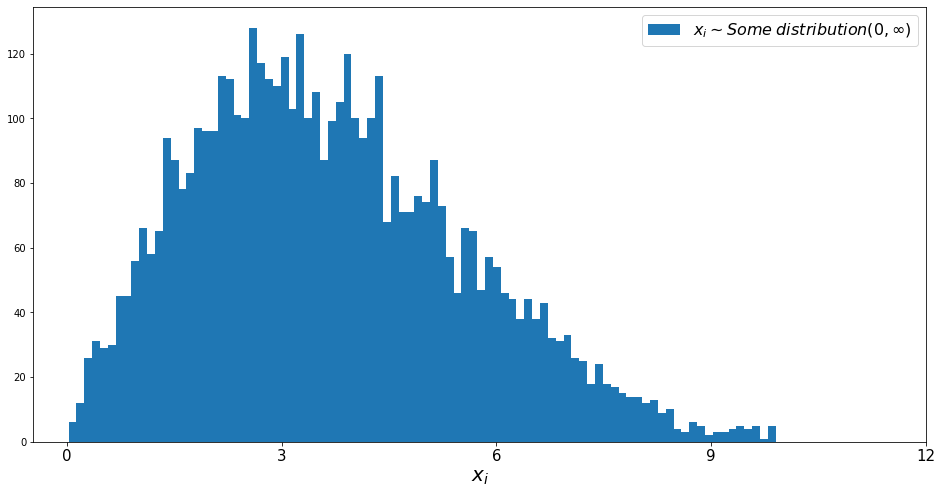

In [6]:
#n = fs.sampler(-3,3,fs.gaussian_func,(mu,sigma),5000)

s = fs.sampler(0,10,fs.some_func,(x_0, sigma_),5000)

plt.hist(s, 90, label = '${x_i} \sim Some \; distribution(0,\infty)$')
plt.xlabel('${x_i}$', fontsize = 20)
plt.legend(prop={'size': 16})
plt.xticks([0,3,6,9,12], fontsize = 15)

<font size="4">Item b) and c)</font> <br>

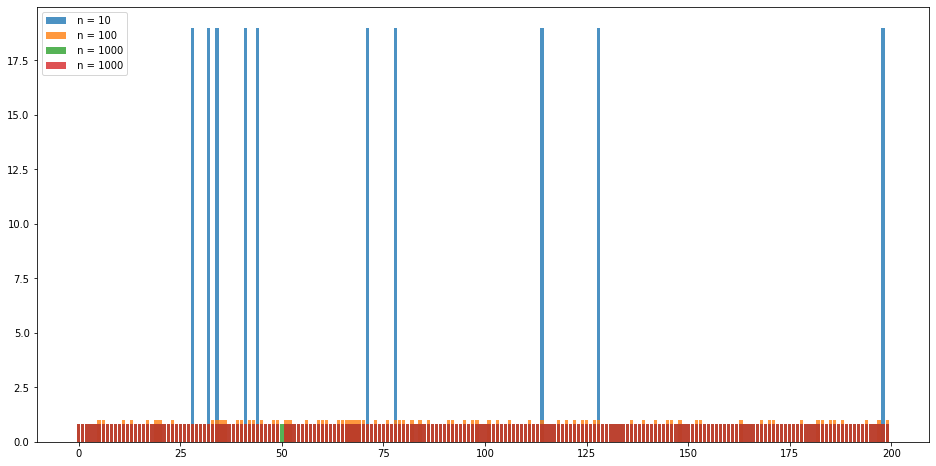

In [317]:
u_interval = np.arange(0, 1.005, 0.005)


for n in [10, 100, 1000, 1000]:
    num_interval_uni = {}
    u_expected = {}
    u_rela_diff = array([])
    uni_dist = np.random.uniform(0,1,n)
    
    for i in range(len(uni_dist)): 
            for j in range(len(u_interval)-1):
                if uni_dist[i] >= u_interval[j] and uni_dist[i] <= u_interval[j+1]:
                    num_interval_uni[j] = num_interval_uni.get(j, 0) + 1

                    inte = u_interval[j+1] - u_interval[j]

                    u_expected[j] = u_expected.get(j,0) + n*inte


    for key in num_interval_uni:
        u_rela_diff = np.append(u_rela_diff, ((num_interval_uni[key]/u_expected[key] - 1)**2)**(1/2))

    plt.bar(list(num_interval_uni.keys()), u_rela_diff, alpha = 0.8, label = ' n = ' + str(n))
    plt.legend(prop={'size': 10})


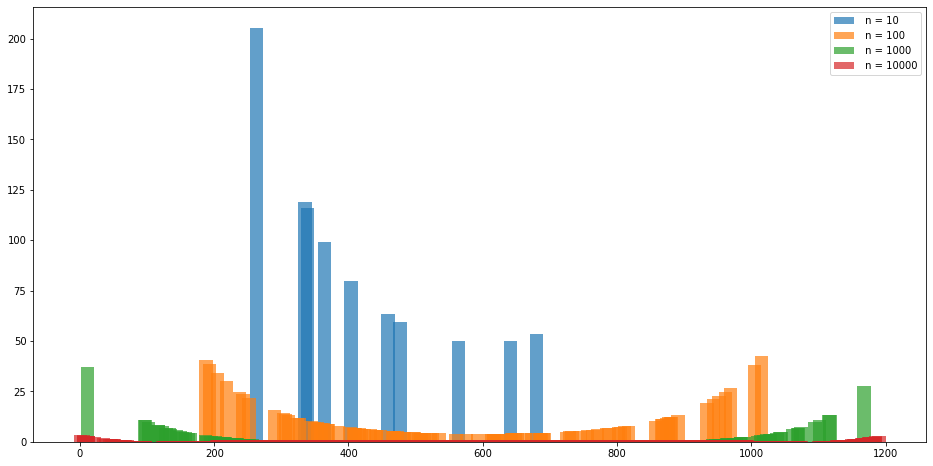

In [8]:

mu = 0
sigma = 1
g_interval = np.arange(-3, 3.005, 0.005)


for n in [10, 100, 1000, 10000]:
    num_interval_gauss = {}
    g_expected = {}
    g_rela_diff = list()
    gauss_dist = fs.sampler(-3,3,fs.gaussian_func, (mu, sigma), n)

    for i in range(len(gauss_dist)): 
            for j in range(len(g_interval)-1):
                if gauss_dist[i] >= g_interval[j] and gauss_dist[i] <= g_interval[j+1]:
                    num_interval_gauss[j] = num_interval_gauss.get(j, 0) + 1

                    inte = quad(fs.gaussian_func,g_interval[j],g_interval[j+1],(mu, sigma))

                    g_expected[j] = g_expected.get(j,0) + n*inte[0]


    for key in num_interval_gauss:
        g_rela_diff.append(((num_interval_gauss[key]/g_expected[key] - 1)**2)**(1/2))

    plt.bar(list(num_interval_gauss.keys()), g_rela_diff, 20, alpha = 0.7, label = ' n = ' + str(n))
    plt.legend(prop={'size': 10})
    
   


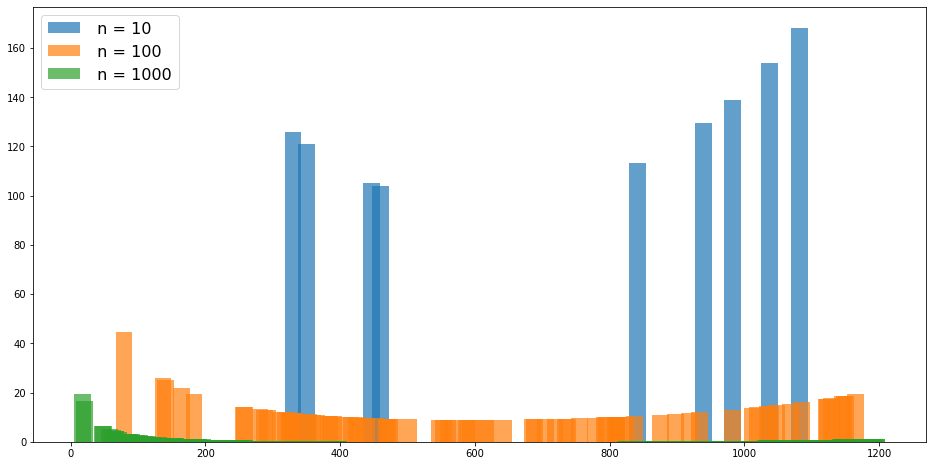

In [12]:
sigma_ = 3
x_0 = 0.1
s_interval = np.arange(sigma_ - 3, sigma_ + 3.005, 0.005)


for n in [10, 100, 1000, 10000]:
    num_interval_some = {}
    s_expected = {}
    s_rela_diff = array([])
    some_dist = fs.sampler(sigma_ - 3, sigma_ + 3,fs.some_func,(x_0,sigma_),n)

    for i in range(len(some_dist)): 
            for j in range(len(s_interval)-1):
                if some_dist[i] >= s_interval[j] and some_dist[i] <= s_interval[j+1]:
                    num_interval_some[j] = num_interval_some.get(j, 0) + 1

                    inte = quad(fs.some_func,s_interval[j],s_interval[j+1],(x_0, sigma_))

                    s_expected[j] = s_expected.get(j,0) + n*inte[0]

    
    for key in num_interval_some:
        s_rela_diff = np.append(s_rela_diff, ((num_interval_some[key]/s_expected[key] - 1)**2)**(1/2))
    
    plt.bar(list(num_interval_some.keys()), s_rela_diff,25, alpha = 0.7, label = ' n = ' + str(n))
    plt.legend(prop={'size': 16})
   


<font size="5">Exercise 2</font> <br>

In this exercise, for a gaussian distribution generated from our sampler, we are going to calculate the mean $\bigg(\sum_{i=0}^N \frac{x_i}{N}\bigg)$ and the variance $\bigg(\sum_{i=0}^N \frac{(x_i-\bar x)^2}{N}\bigg)$ for $N = 10$.

We will then repeat this process for t = 1000 times. Each time we do this we will calculate the mean of the mean and the mean of the variance, then plot these results for each iteration.

(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

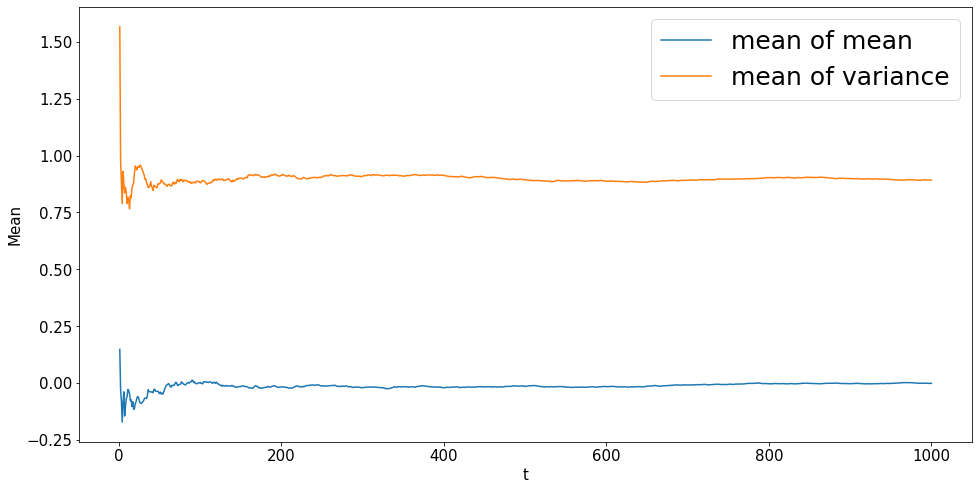

In [272]:
mu = 0 
sigma = 1
N = 10


t = array([])
m_array = array([])
mm_array = array([])
v_array = array([])
mv_array = array([])


for i in range(1000):
    
    t = np.append(t, i+1)
    
    
    #Using numpy sampler...
    gaussian = np.random.normal(mu, sigma, N)
    
    m_array = np.append(m_array, sum(gaussian)/N)
    
    mm_array = np.append(mm_array, sum(m_array)/t[i])
    
    v_array = np.append(v_array, sum((gaussian - sum(gaussian)/N)**2)/N)
    
    mv_array = np.append(mv_array, sum(v_array)/t[i])
    

plt.plot(t, mm_array, label = 'mean of mean')
plt.plot(t, mv_array, label = 'mean of variance')
plt.legend(prop={'size': 25})
plt.xlabel('t', fontsize = 15)
plt.ylabel('Mean', fontsize = 15)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

Utilizing numpy's sampler for a gaussian distribution we obtain the variance a little bit off from the expected value.


<font size="5">Exercise 3</font> <br>
Now we are going to plot the skewness and the curtosis for equation (3). We will be plotting it in relation to N so that we can identify when these values stabilize at two decimal places. 

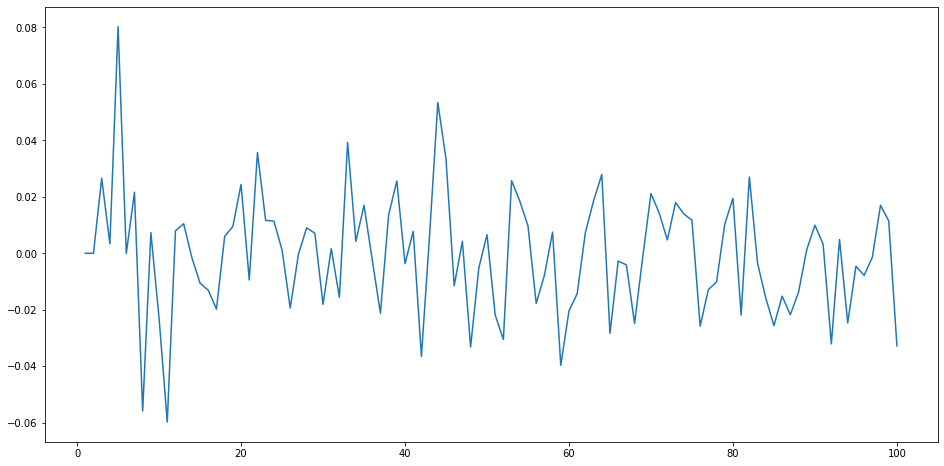

In [26]:
x_0 = 0.1
sigma_ = 3
n = tuple(range(1,101))



skew_list = list()

def skew (n: int, sigma_: float, dist: array([])):
    return (1/(n*(sigma_)**3))*sum((dist - np.mean(dist))**3)

for i in range(100):
    
    some_dist = fs.sampler(sigma_ - 3, sigma_ + 3,fs.some_func,(x_0,sigma_), i+1)
    
    
    skew_list.append(skew(i+1, sigma_, some_dist))
    
plt.plot(n,skew_list)

In [30]:
some_dist = fs.sampler(sigma_ - 3, sigma_ + 3,fs.some_func,(x_0,sigma_), 10000)
skew_value = skew(10000, sigma_, some_dist)
print(skew_value)

-0.0003803879118169858


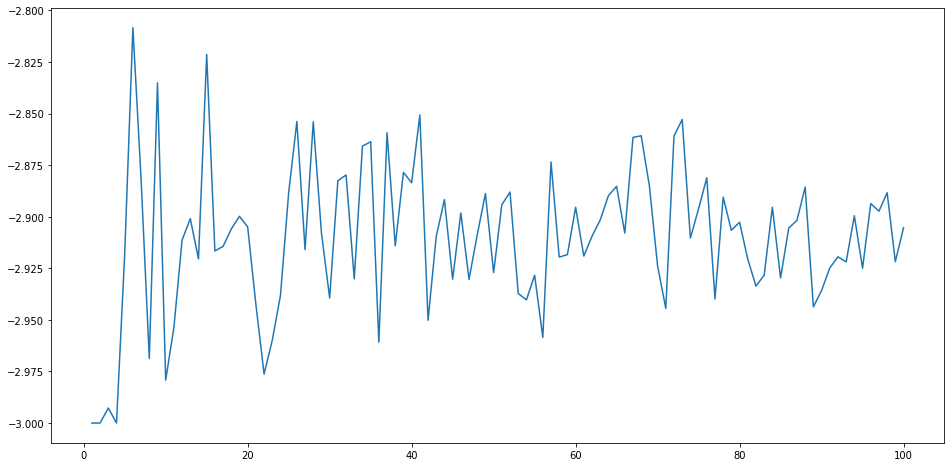

In [28]:
curtosis_list = list()

def curtosis (n: int, sigma_: float, dist: array([])):
    return (1/(n*(sigma_)**4))*sum((dist - np.mean(dist))**4) - 3

n = tuple(range(1,101))


for i in range(100):
    
    some_dist = fs.sampler(sigma_ - 3, sigma_ + 3,fs.some_func,(x_0,sigma_), i+1)
    
    curtosis_list.append(curtosis(i+1, sigma_, some_dist))
    
plt.plot(n,curtosis_list)
    

Taking to long to reach higher numbers of $n$. Need to optimize random number generator!!

<font size="5">Exercise 4</font> <br>

<font size="4">Item a)</font> <br>
Lets generate a set of data $\{x_i, y_i\}$ for distributions from equation (1) and equation (2), then let's calculate the covariance and the correlation between the two. Doing this we will anylize at what value of N will the covariância converge to 0 with a precision of two decimal places.


(-0.075, 0.075)

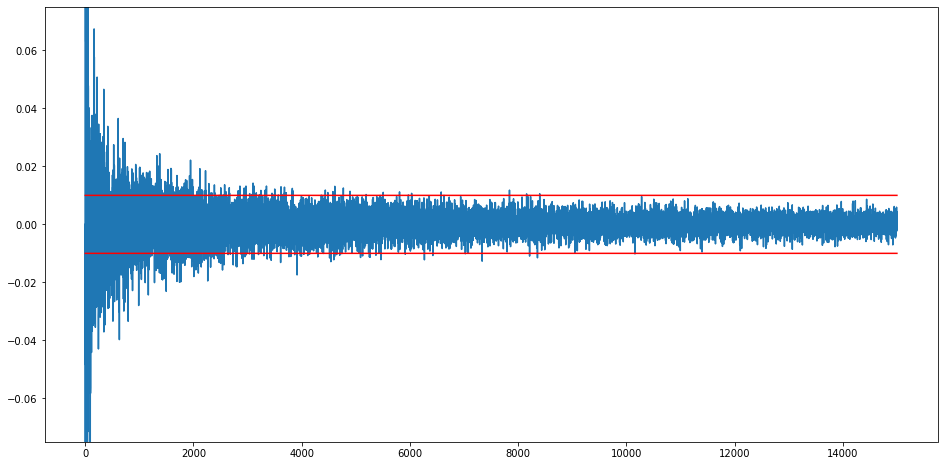

In [67]:
mu = 0
sigma = 3 

def cov(x: list(), y: list(), n: int):
    return (1/n)*sum((x - np.mean(x))*(y - np.mean(y)))

def var(x: list, n: int):
    return sum((x - np.mean(x))**2/n)

def cor(cov: float, var_x: float, var_y: float):
    return (cov/(var_x*var_y))


n=15000
mu = 0
sigma = 1
_n = tuple(range(1,n+1))
cov_list = list()
limit_1 = list()
limit_2 = list()

cor_list = list()


for i in range(n):
    x = np.random.uniform(0,1,i+1)

    y = np.random.normal(mu, sigma, i+1)

    cov_list.append(cov(x,y,i+1))
    
    limit_1.append(0.01)
    
    limit_2.append(-0.01)
    
    if len(x) > 1 and len(y) > 1:
        
        cor_list.append(cor(cov(x,y,i+1), var(x, i+1), var(y, i+1)))
    
plt.plot(_n, cov_list)
plt.plot(_n, limit_1, c = 'r')
plt.plot(_n, limit_2, c = 'r')
plt.ylim(-0.075, 0.075)


We can see that our covariance stabilizes at two decimal places around 12000 values of n

(-1.0, 1.0)

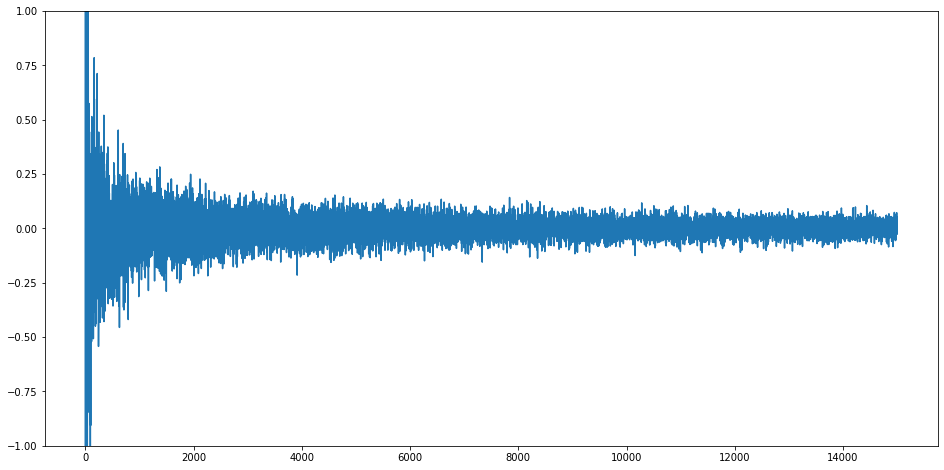

In [73]:
_n_ = tuple(range(1,n))
plt.plot(_n_, cor_list)
plt.ylim(-1, 1)

<font size="4">Item b)</font> <br>
Let's now repeat what we did in item a) but with the set of data $\{x_i,y_i + x_i\}$ and $\{x_i,y_i - x_i\}$.

Starting with $\{x_i,y_i + x_i\}$:

(0.0, 0.16)

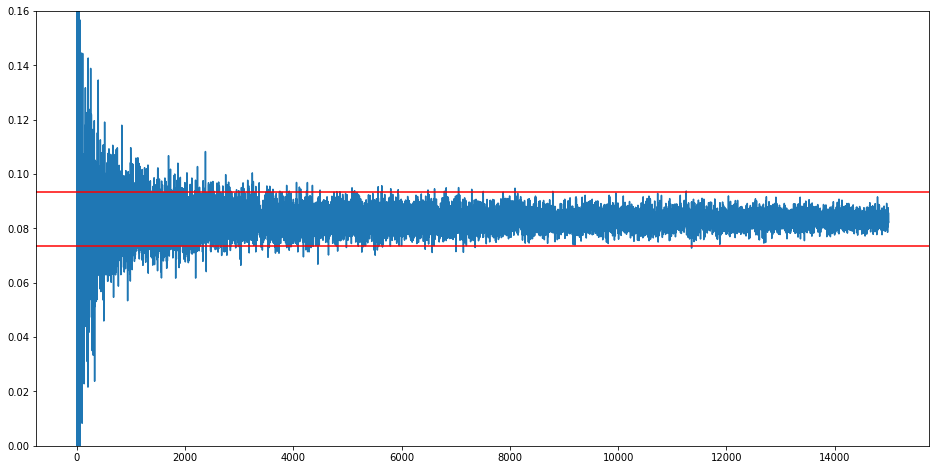

In [101]:
cov_list2 = list()


cor_list2 = list()

z = list()

limitx = list()
limity = list()
for i in range(n):
    x = np.random.uniform(0,1,i+1)

    y = np.random.normal(mu, sigma, i+1)
    
    cov_list2.append(cov(x,x + y,i+1))
    
    if len(x) > 1 and len(x + y) > 1:
        
        cor_list2.append(cor(cov(x, x + y,i+1), var(x, i+1), var(x + y, i+1)))
    
plt.plot(_n, cov_list2)
plt.axhline( y = np.mean(cov_list2) + 0.01, c = 'r')
plt.axhline( y = np.mean(cov_list2) - 0.01, c = 'r')
plt.ylim(0.0, 0.16)

Our covariance stabilizes around 12000 values of n.

(0.2, 1.6)

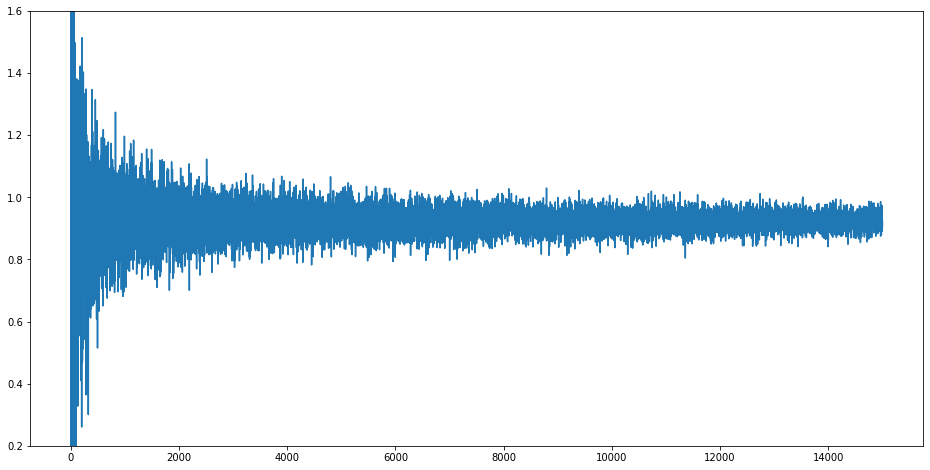

In [108]:
plt.plot(_n_, cor_list2)
plt.ylim(0.2, 1.6)

Now repeating the process with $\{x_i,y_i - x_i\}$:

In [200]:
cov_list3 = list()


cor_list3 = list()


for i in range(n):
    x = np.random.uniform(0,1,i+1)

    y = np.random.normal(mu, sigma, i+1)
    
    cov_list3.append(cov(x, y - x,i+1))
    
    if len(x) > 1 and len(y-x) > 1:
        
        cor_list3.append(cor(cov(x,y-x,i+1), var(x, i+1), var(y-x, i+1)))

(-0.175, 0.0)

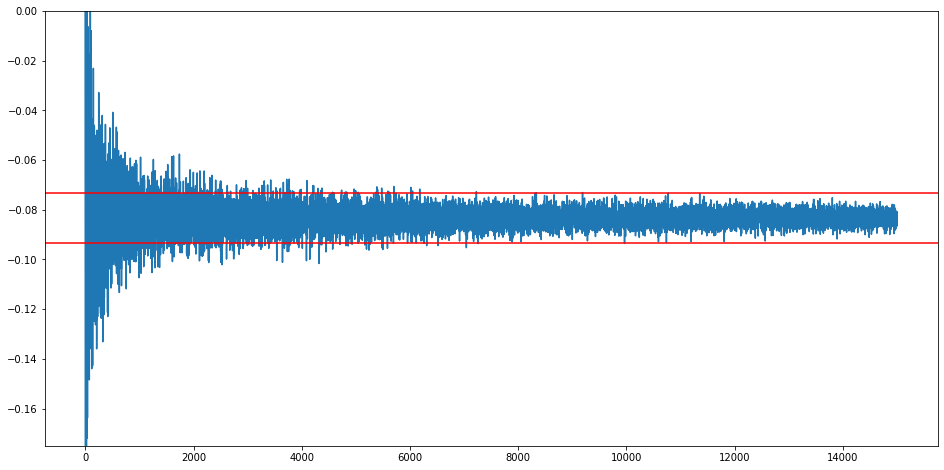

In [201]:
plt.plot(_n, cov_list3)
plt.axhline( y = np.mean(cov_list3) + 0.01, c = 'r')
plt.axhline( y = np.mean(cov_list3) - 0.01, c = 'r')
plt.ylim(-0.175, 0.0)

Stabilizes at around n = 13000

(-1.75, -0.25)

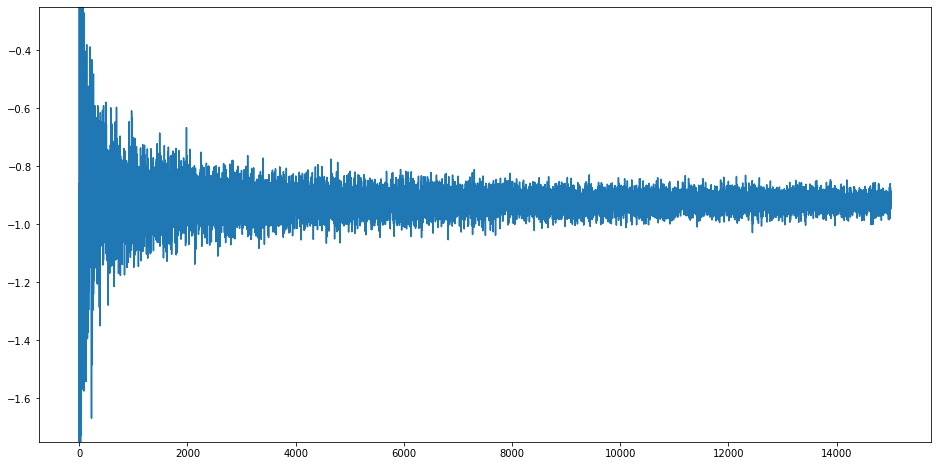

In [123]:
plt.plot(_n_, cor_list3)
plt.ylim(-1.75, -0.25)

<font size="4">Item c)</font> <br>

Now let's create a scatter plot for each of the three sets i.e $\{x_i, y_i \}$ , $\{x_i, x_i + y_i\}$ and $\{x_i, x_i - y_i\}$. 

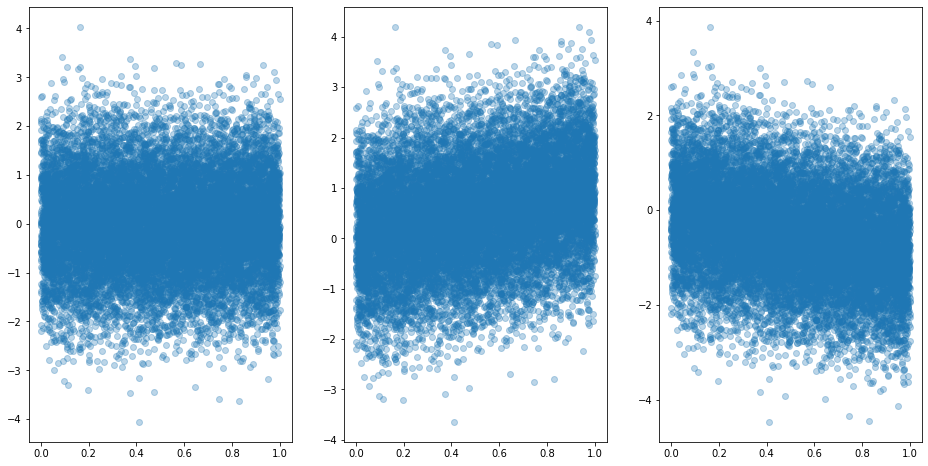

In [125]:

fig, (plt1, plt2, plt3) = plt.subplots(1, 3)
plt1.scatter(x, y, alpha = 0.3)
plt2.scatter(x, y + x, alpha = 0.3)
plt3.scatter(x,y - x, alpha = 0.3)


<font size="5">Exercise 5</font> <br>

<font size="4">Item a)</font> <br>
Lets generate data for distribution from equation (1) and equation (2), then let's calculate the covariance and the correlation between the two. Doing this we will anylize at what value of N will the covariância converge to 0 with a precision of two decimal places.

In this exercise we are going to generate $n$ values of the binomial distribution

$$P(r) = p^r(1 - p)^{(n-r)} \binom{n}{r}$$

for values of $n = 10, 100, 1000, 10000$ given that the product $\lambda = np$ is a constante (remember that: p < 1). 

After that we are going generate values for the poisson distribution

$$P(r) = e^{-\lambda} \bigg( \frac{\lambda^r}{r!} \bigg).$$

Upon generating these values we will use them to plot graphs and analyze which value of n the binomial distribution can be aproximated to the Poisson distribution.


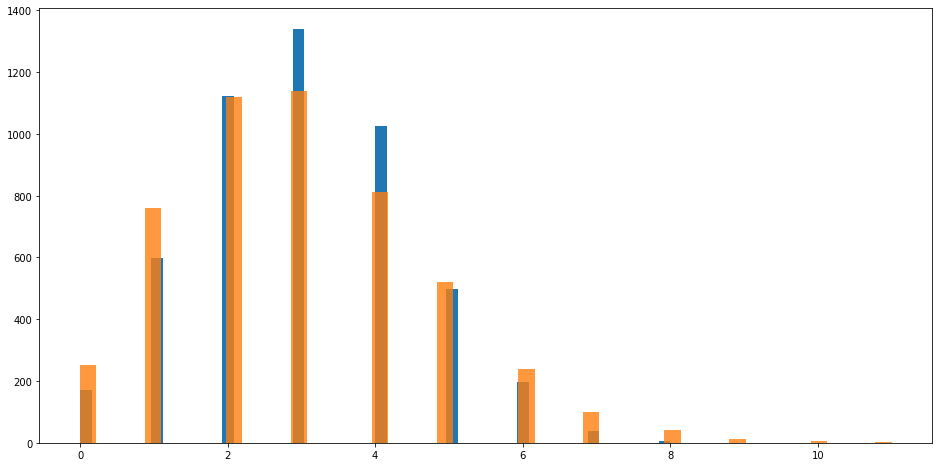

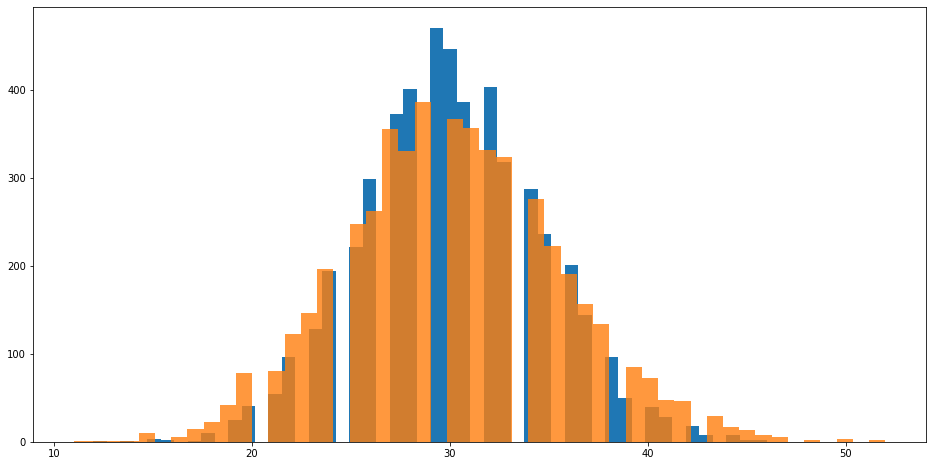

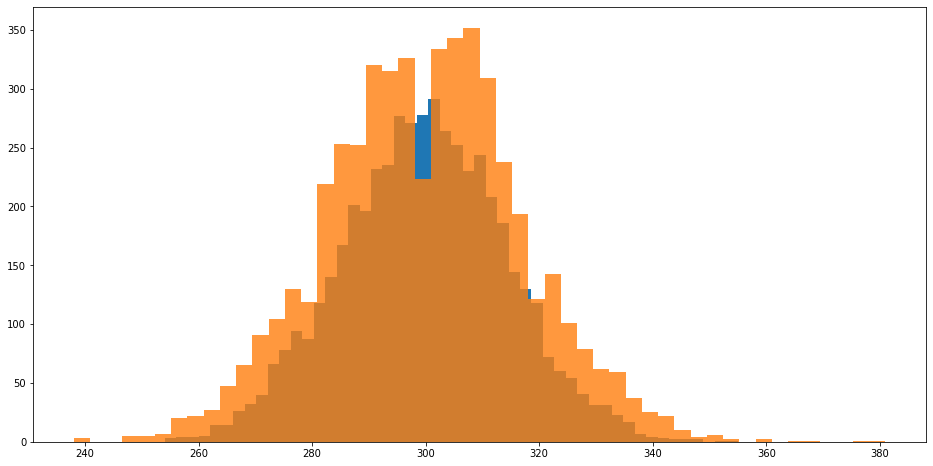

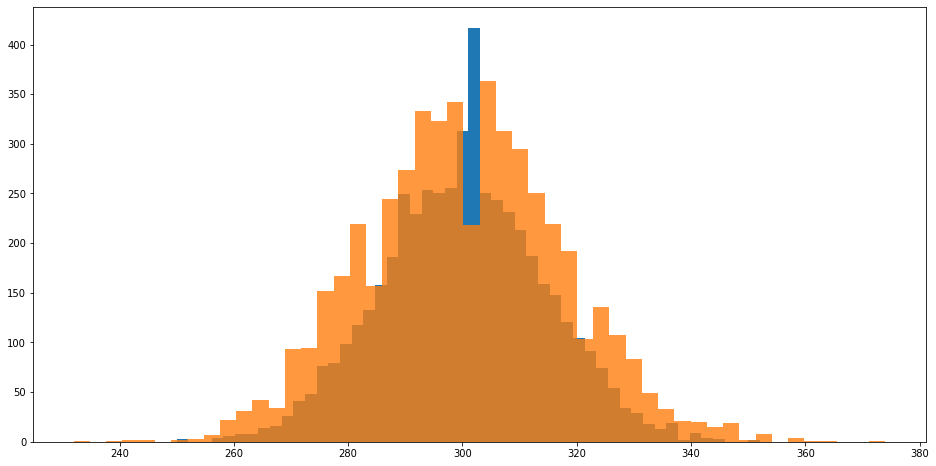

In [7]:
N = 5000
p = 0.3

for n in [10, 100, 1000, 1000]:
    binomial = np.random.binomial(n, p, N)
    poisson = np.random.poisson(p*n, N)
                
    plt.hist(binomial, 50, alpha = 1)
    plt.hist(poisson, 50, alpha = 0.8)
    plt.show()

        

Only very large values of $n$ in the binomial distribution can approximate to a poisson distribution. As we can see from the graphs we were only able to obtain something close to the poissoin distribution at $n = 10000$

<font size="5">Exercise 6</font> <br>
For each poisson distribution, generate data for values of $\lambda = 1, 5, 20, 100, 1000$ and compare the results with the gaussian distribution with mean $\lambda$ and standard deviation $\sqrt{\lambda}$

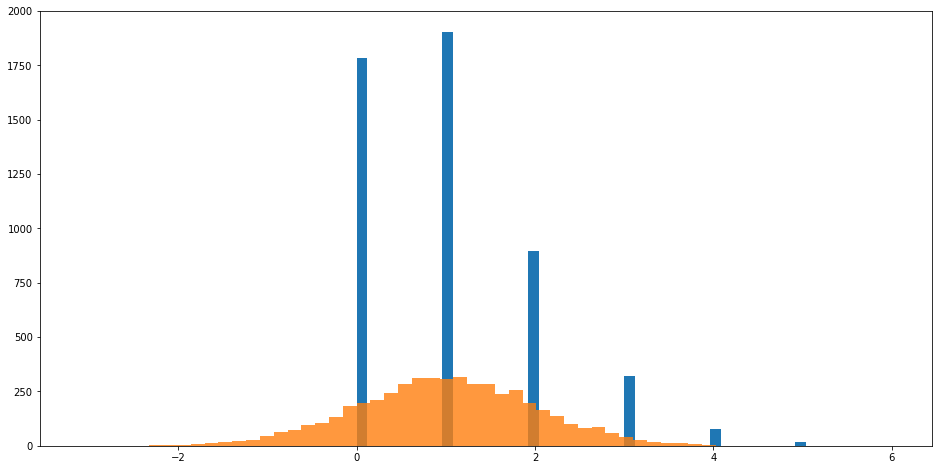

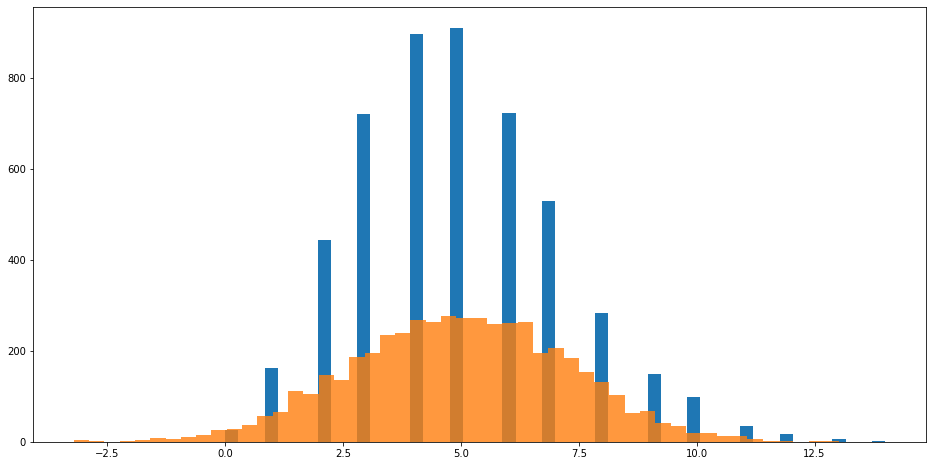

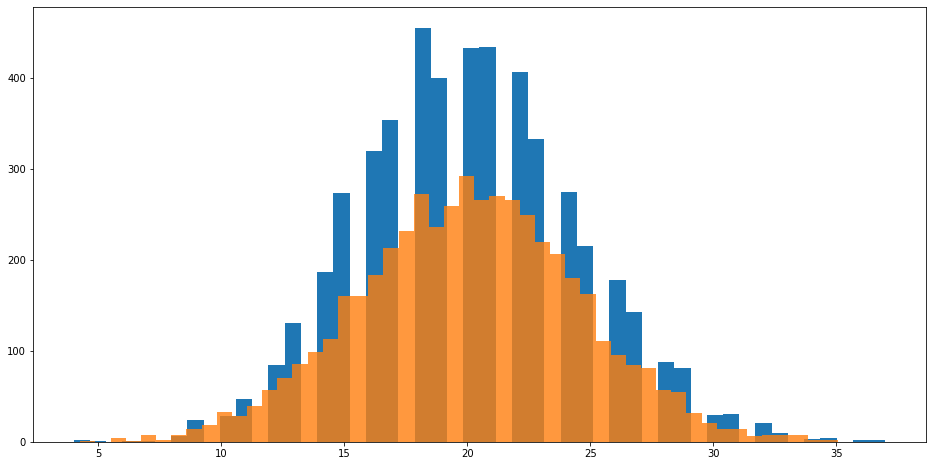

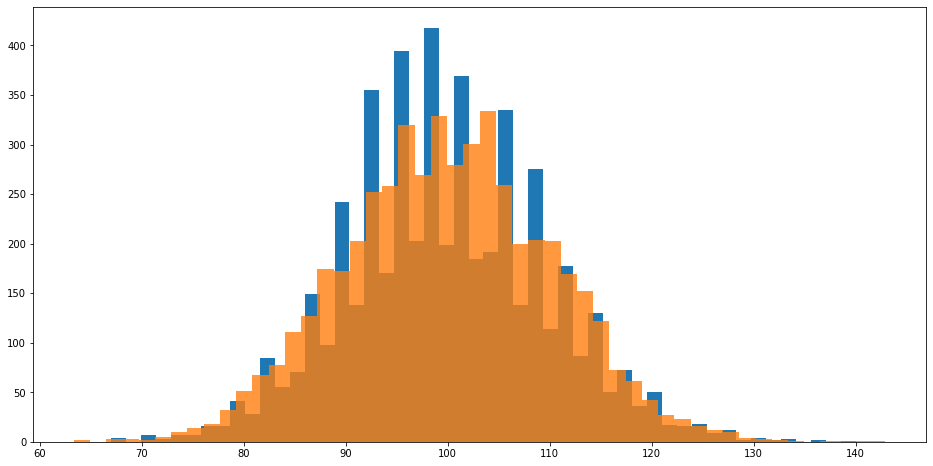

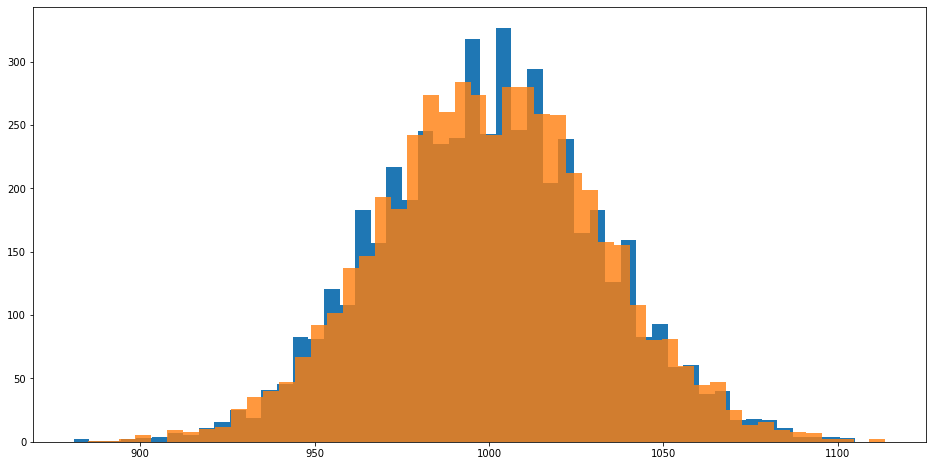

In [8]:
N = 5000

for lam in [1,5,20,100,1000]:
    poisson = np.random.poisson(lam, N)
    gaussian = np.random.normal(lam, (lam)**(1/2), N)
    
    plt.hist(poisson, 50, alpha = 1)
    plt.hist(gaussian, 50, alpha = 0.8)
    plt.show()
    

As you can see, the poisson distribution tends to a gaussian distrbuiton as lambda's value grows.




<font size="5">Exercise 7</font> <br>
Given the multivariade gaussian 

$$P(x,y) = \frac{e^{-\frac{1}{2}\big(\frac{x-\mu_x}{\sigma_x}\big)^2 - \frac{1}{2}\big(\frac{y-\mu_y}{\sigma_y}\big)^2}}{2\pi\sigma_x\sigma_y}$$

let's rename the exponente as 

$$R^2 = \big(\frac{x-\mu_x}{\sigma_x}\big)^2 - \big(\frac{y-\mu_y}{\sigma_y}\big)^2.$$

Given intervals $\Omega_n$ defined by $R^2 \geq n^2, n = 1,2,3,$ calculate 

$$P(n\sigma) \equiv \int_{\Omega_n}^{} P(x,y) \,dxdy.$$





<font size="4">Solution</font> <br>


First we need to solve this integral by hand. 
    
Let's define $x' = \frac{x-\mu_x}{\sigma_x}$ and $y' = \frac{y-\mu_y}{\sigma_y}$. Therefore we have that $dx' = \frac{dx}{\sigma_x}$ and $dy' = \frac{dy}{\sigma_y}$. We can then write $R^2 = x'^2 + y'^2$. Writing all this into our integral we have

$$P(R) = \int e^{-\frac{1}{2}x'^2} e^{-\frac{1}{2}y'^2} dx'dy'.$$

Changing into polar coordinates we have

$$ \int_{0}^{2\pi} \int_{0}^{R} e^{-\frac{1}{2}r^2} r dr d\theta.$$

Let's define $u = r^2$, therefore $rdr = \frac{du}{2}$. Substituting this into the above integral we have 

$$\int_{0}^{2\pi} \int_{0}^{R^2} e^{-\frac{1}{2}u} du d\theta.$$

Solving the integral we obtain

$$1 - e^{-\frac{1}{2}R^2}$$

As $\Omega_x$ and $\Omega_y$ are constants, let's assume a value of $1$ for them, and so we finally have

$$P(R) = 1 - e^{-\frac{1}{2}R^2} $$

As the integral was solved analytically we now can calculate it numerically for n = 1, 2, 3. 

In [9]:
for n in [1,2,3]:
    print(str(n) + '-sigma:' , 1 - np.exp((-1/2)*n**2))

1-sigma: 0.3934693402873666
2-sigma: 0.8646647167633873
3-sigma: 0.9888910034617577


<font size="5">Exercise 10</font> <br>

<font size="4">Item a)</font> <br>
Here we are going to generate 100 values of data from uniforme distribution. We will do this for $L = 2, 8 , 16, 64, 1024$. After that we will obtain a new set of data in which it will be defined by $z_i \equiv \sum_{j=1}^L \frac{x_i^j}{L}$. After that we will then plot $\{z_i\}$ in a histogram for each value of $L$. After that we will then plot a gaussian distribution using $\bar{z}$ and $V(z)$.

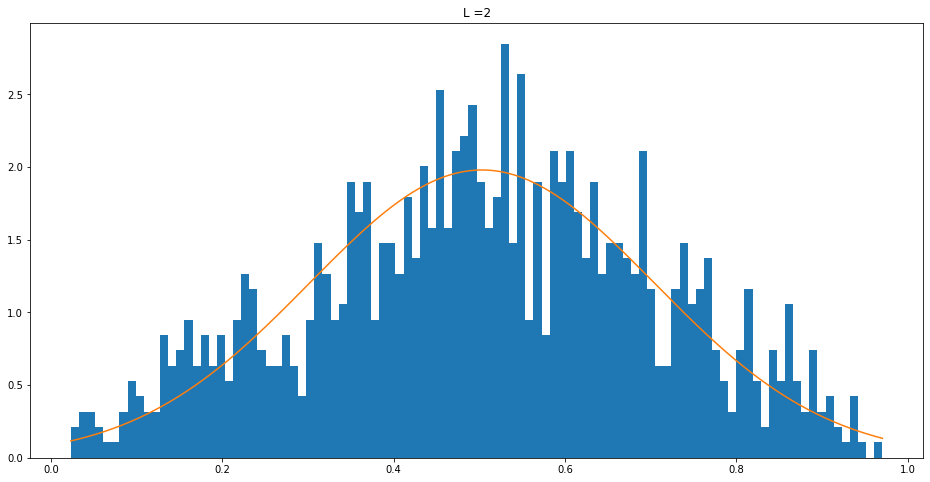

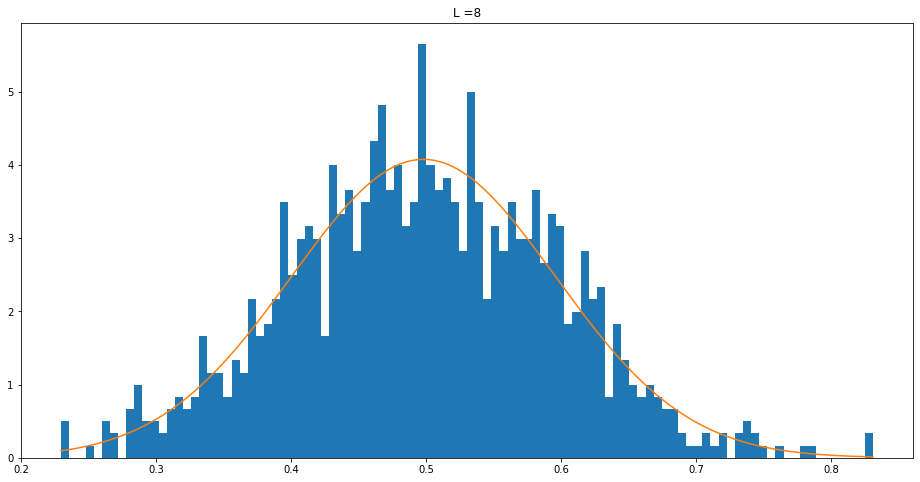

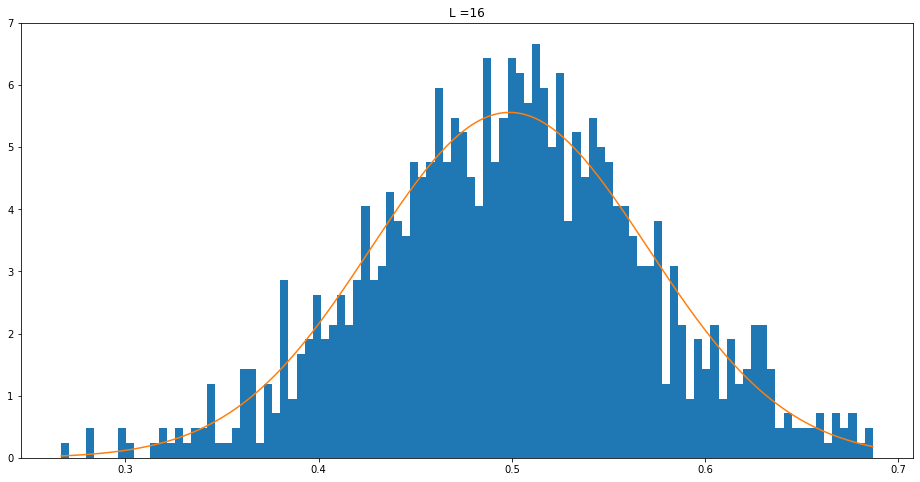

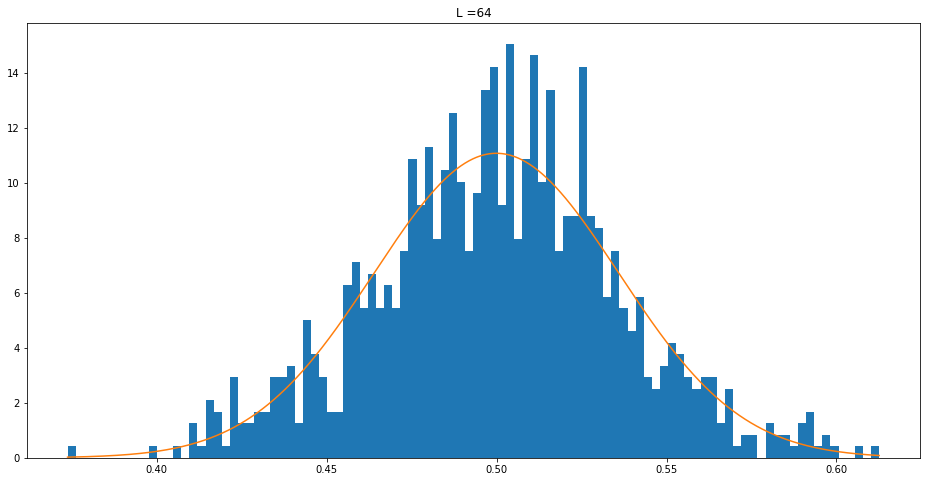

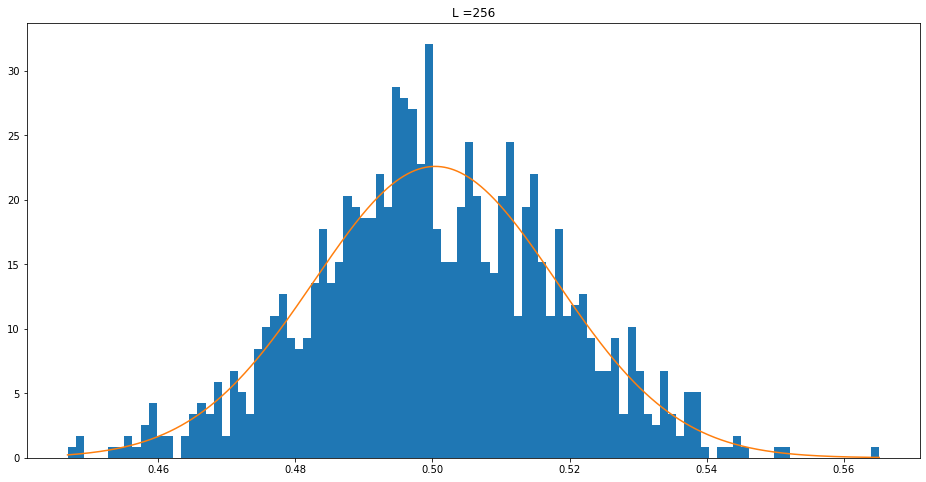

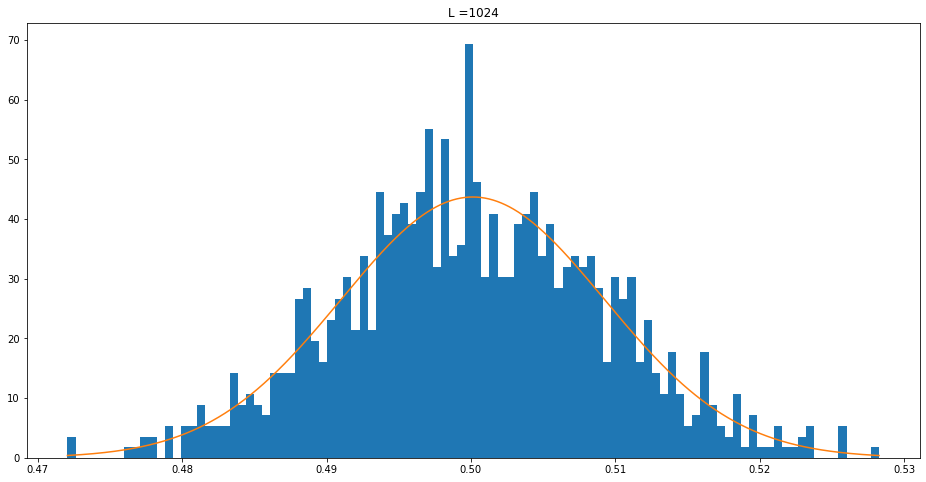

In [321]:
N = 1000
x = {}
_L = [2,8,16,64,256,1024]

for L in _L:
    x[L] = [np.random.uniform(0,1,N) for i in range(L)] 
    z = sum(x[L])/L
    zm = np.mean(z)
    zv = np.var(z)
    zdic[L] = (z, zm, zv)
    plt.hist(z, 100, density = True)
    _x_ = np.linspace(min(z), max(z), 1000)
    zg = fs.gaussian_dist(_x_, zm, np.sqrt(zv))
    plt.title("L =" + str(L))
    plt.plot(_x_, zg)
    plt.show()

<font size="4">Item b)</font> <br>
Repeat the process from a) but with gaussian unidimensional variables

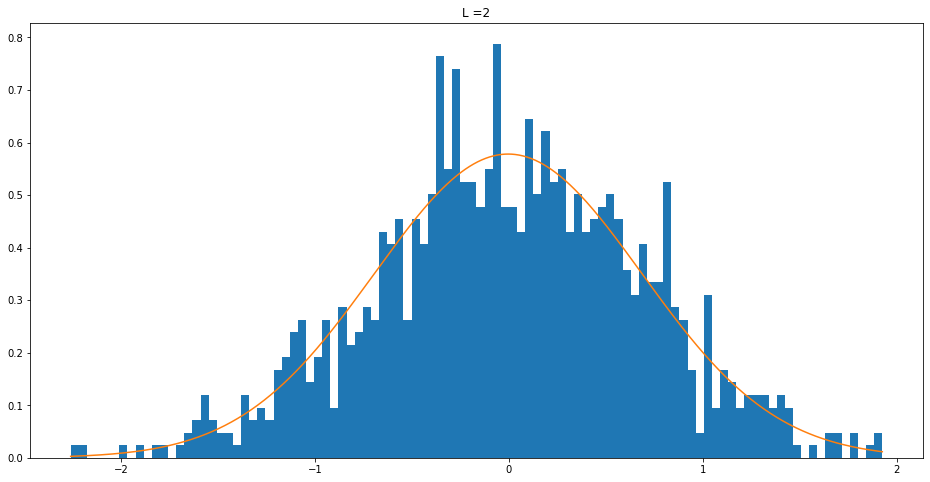

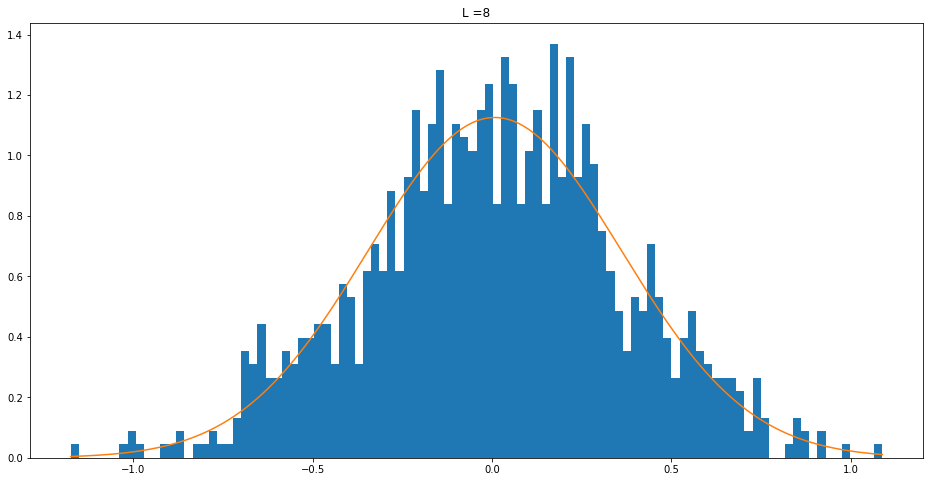

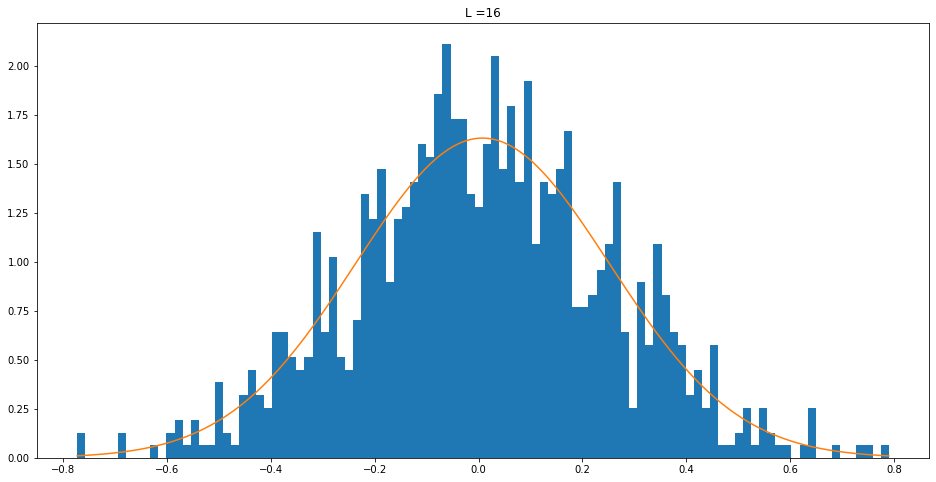

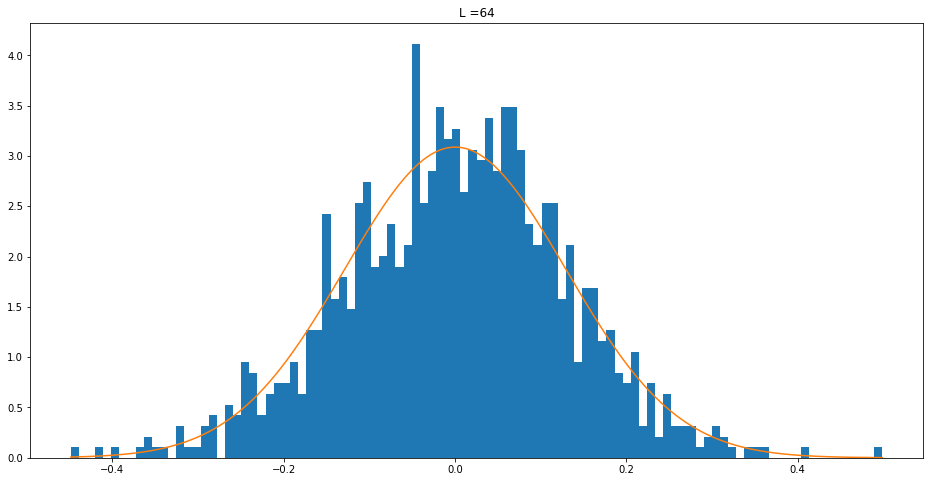

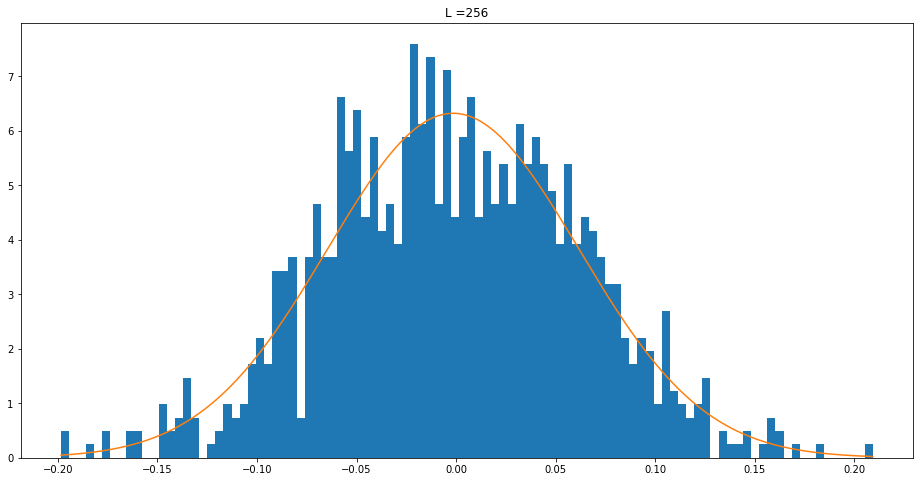

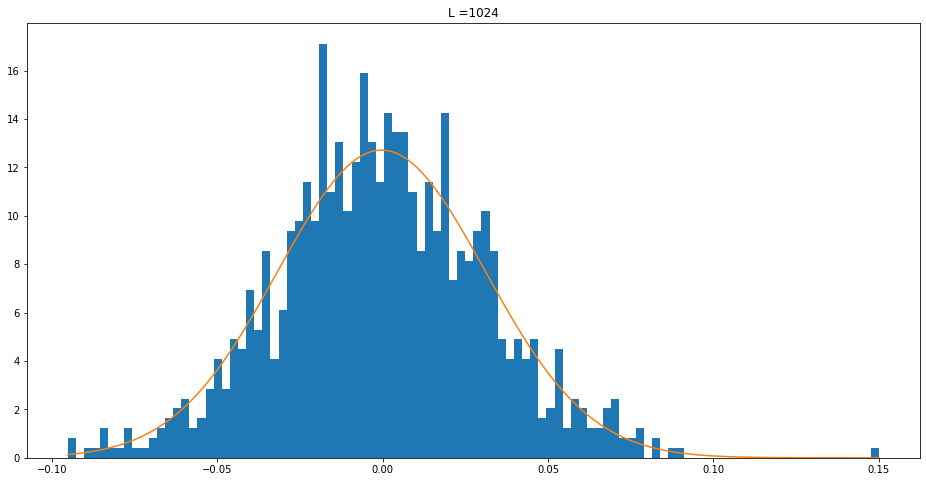

In [322]:
N = 1000
x = {}
_L = [2,8,16,64,256,1024]

for L in _L:
    x[L] = [np.random.normal(0,1,N) for i in range(L)] 
    z = sum(x[L])/L
    zm = np.mean(z)
    zv = np.var(z)
    plt.hist(z, 100, density = True)
    _x_ = np.linspace(min(z), max(z), 1000)
    zg = fs.gaussian_dist(_x_, zm, np.sqrt(zv))
    plt.title("L =" + str(L))
    plt.plot(_x_, zg)
    plt.show()   


<font size="4">Item b)</font> <br>
Repeat the process from a) but with gaussian two dimensional variables. To work with this let's sum the distributions.

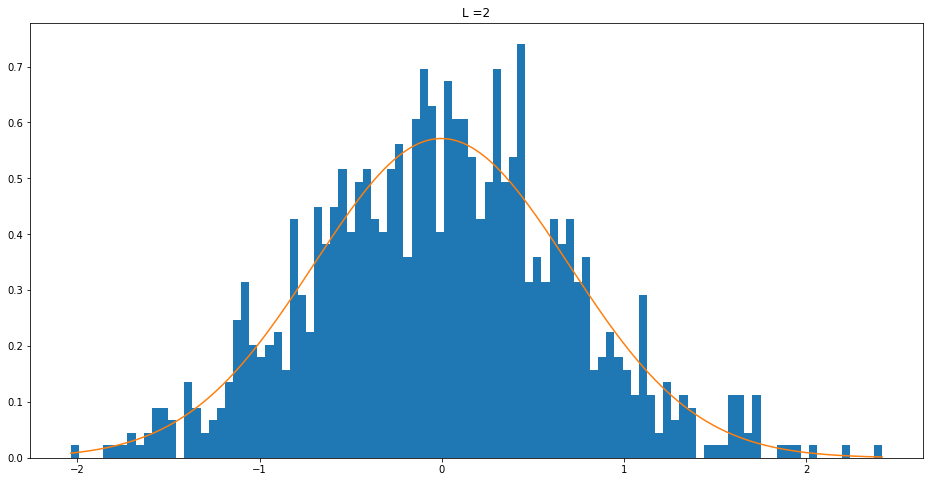

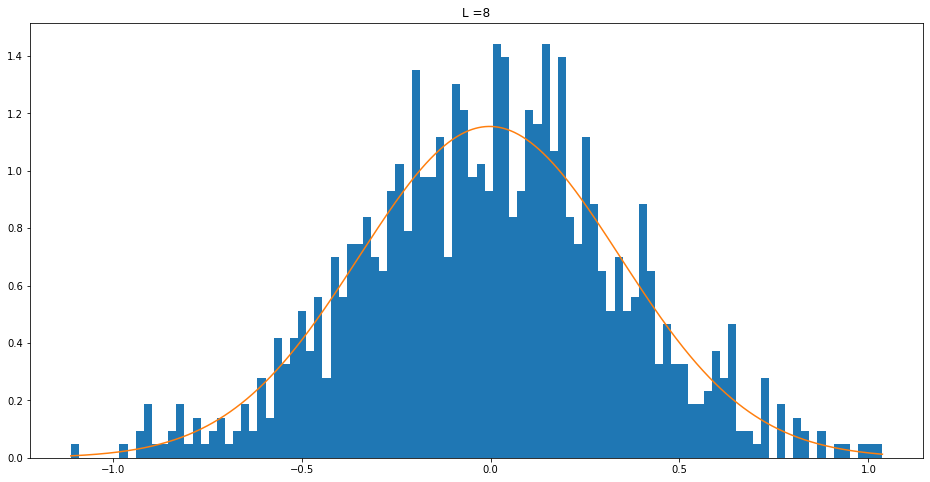

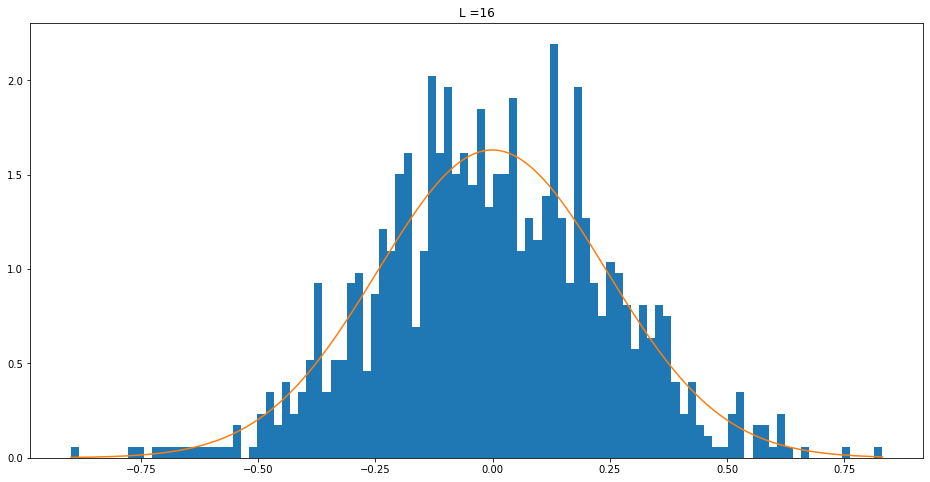

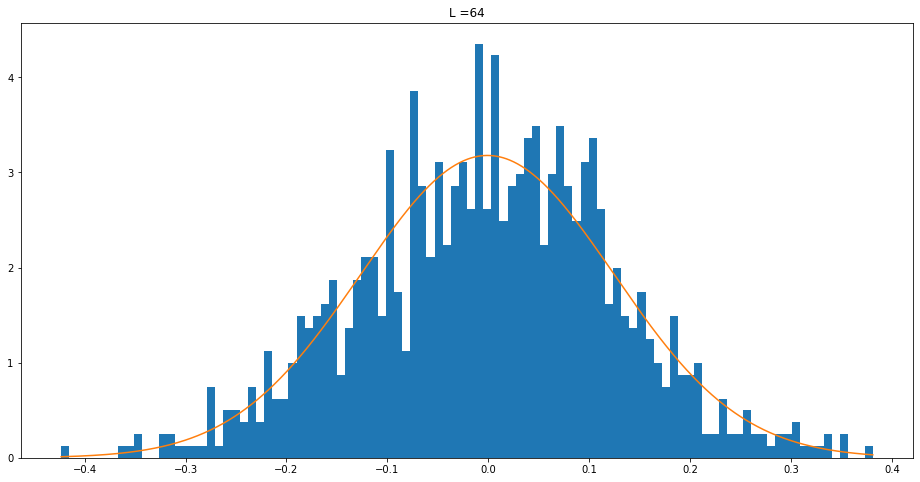

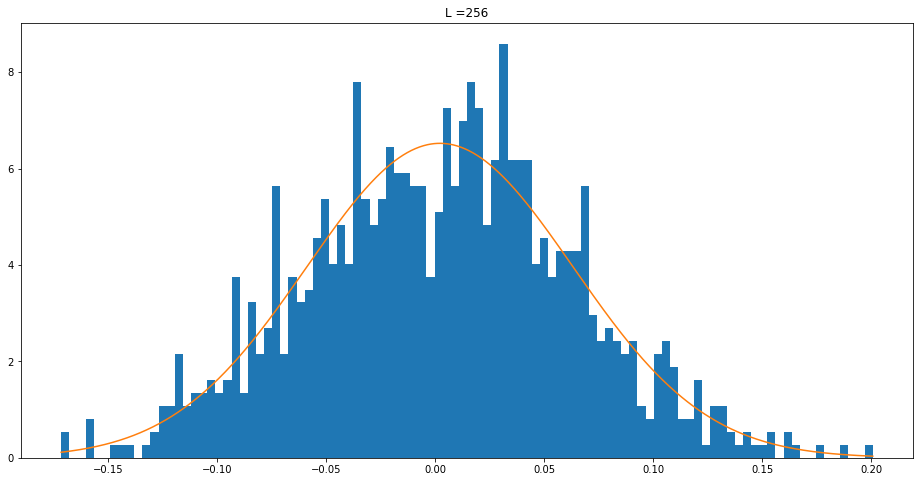

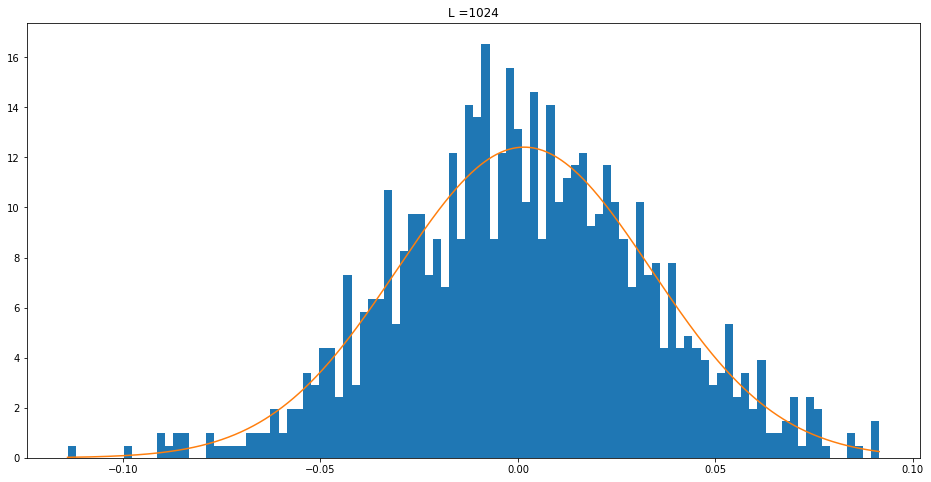

In [323]:
N = 1000
x = {}
x2 = {}
_L = [2,8,16,64,256,1024]

for L in _L:
    x[L] = [np.random.normal(0,1,N) + np.random.normal(0,1,N) for i in range(L)]
    x[L] = [np.random.normal(0,1,N) for i in range(L)] 
    z = sum(x[L])/L
    zm = np.mean(z)
    zv = np.var(z)
    plt.hist(z, 100, density = True)
    _x_ = np.linspace(min(z), max(z), 1000)
    zg = fs.gaussian_dist(_x_, zm, np.sqrt(zv))
    plt.title("L =" + str(L))
    plt.plot(_x_, zg)
    plt.show()   

In [ ]:
L_list = [2,8,16,64]
for a in L_list:
    for d in range(0,a):
        gaussian1 = np.random.normal(0,1,1000)
        gaussian2 = np.random.normal(2,2,1000)
        temporary_point_list = gaussian1 + gaussian2
        if d == 0:
            points_list = temporary_point_list
        else:
            points_list = [points_list[c] + temporary_point_list[c] for c in range(0,1000)]
            
    points2_list= [f/a for f in points_list]
    mean = np.sum(points2_list) / len(points2_list)
    sigma = np.sqrt(np.sum((points2_list - mean)**2) / len(points2_list))
    print(sigma)
    x_list = np.linspace(mean - 3*sigma, mean + 3*sigma, 1000)
    plt.hist(points2_list, bins=100, density=True)
    plt.plot(x_list, stats.norm.pdf(x_list, mean, sigma))
    plt.title('2D-Gaussian')
    plt.show()

In [ ]:
L_list = [2,8,16,64]
for a in L_list:
    for d in range(0,a):
        temporary_point_list = []
        for b in range(0,1000):
            new_point_gauss= gauss_generator.generate_random_point()
            temporary_point_list.append(new_point_gauss[0])
        if d == 0:
            points_list = temporary_point_list
        else:
            points_list = [points_list[c] + temporary_point_list[c] for c in range(0,1000)]
            
    points2_list= [f/a for f in points_list]
    mean = np.sum(points2_list) / len(points2_list)
    sigma = np.sqrt(np.sum((points2_list - mean)**2) / len(points2_list))
    print(sigma)
    x_list = np.linspace(mean - 3*sigma, mean + 3*sigma, 1000)
    plt.hist(points2_list, bins=100, density=True)
    plt.plot(x_list, stats.norm.pdf(x_list, mean, sigma))
    plt.title('1D-Gaussian')
    plt.show()